<a href="https://colab.research.google.com/github/karno128/Data_travel/blob/main/Hasil_Clustering_Algortima_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**
k-means adalah algoritma pembelajaran mesin tanpa pengawasan yang digunakan untuk menemukan kelompok (cluster) yang memiliki karakteristik serupa. Kami akan menggunakan kumpulan Kemiskinan untuk mengelompokkan beberapa Variabel di dalam data kemiskinan. Kumpulan data berasal dari BPS ini berisi Jumlah Penduduk Miskin 2021-2023 dan Tingkat Pengangguran 2021-2023.

# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Exploratory Data Analysis** (EDA) adalah langkah penting sebelum melakukan clustering K-Means atau metode clustering lainnya. EDA membantu dalam memahami struktur, pola, dan hubungan dalam data sebelum melanjutkan ke tahap pemodelan. Berikut adalah tahapan EDA yang umumnya dilakukan sebelum melakukan clustering K-Means:

1.   Deskripsi Data
2.   Memuat Data
3.   *Missing Value*
4.   Menghapus Duplikasi Data
5.   Deskripsi Statistik
6.   Visualisasi Data (Histogram)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Kemiskinana/Jumlah Penduduk Miskin menurut Kabupaten_Kota di Jawa Timur.csv')
data

,No,Kode_Provinsi,Provinsi,Kode_kabupaten_kota,Kab/Kota,Penduduk Miskin_2021,Penduduk Miskin_2022,Penduduk Miskin_2023,TPT_2021,TPT_2022,TPT_2023
0,1,35,Jawa Timur,3501,Pacitan,84.19,76.93,76.20,2.04,3.65,1.83
1,2,35,Jawa Timur,3502,Ponorogo,89.94,81.80,83.71,4.38,5.51,4.66
2,3,35,Jawa Timur,3503,Trenggalek,84.89,76.75,74.58,3.53,5.37,4.52
3,4,35,Jawa Timur,3504,Tulungagung,78.59,70.52,68.81,4.91,6.65,5.65
4,5,35,Jawa Timur,3505,Blitar,112.62,101.94,101.94,3.66,5.45,4.91
5,6,35,Jawa Timur,3506,Kediri,184.49,169.46,171.18,5.15,6.83,5.79
6,7,35,Jawa Timur,3507,Malang,276.58,252.88,251.36,5.40,6.57,5.70
7,8,35,Jawa Timur,3508,Lumajang,105.25,95.04,93.82,3.51,4.97,3.67
8,9,35,Jawa Timur,3509,Jember,257.09,232.73,236.46,5.44,4.06,4.01
9,10,35,Jawa Timur,3510,Banyuwangi,130.93,122.01,119.52,5.42,5.26,4.75


In [ ]:
#Missing Value
data.isna()

,No,Kode_Provinsi,Provinsi,Kode_kabupaten_kota,Kab/Kota,Penduduk Miskin_2021,Penduduk Miskin_2022,Penduduk Miskin_2023,TPT_2021,TPT_2022,TPT_2023
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

No                      0
Kode_Provinsi           0
Provinsi                0
Kode_kabupaten_kota     0
Kab/Kota                0
Penduduk Miskin_2021    0
Penduduk Miskin_2022    0
Penduduk Miskin_2023    0
TPT_2021                0
TPT_2022                0
TPT_2023                0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Melihat tipe data setiap kolom
print(data.dtypes)

No                        int64
Kode_Provinsi             int64
Provinsi                 object
Kode_kabupaten_kota       int64
Kab/Kota                 object
Penduduk Miskin_2021    float64
Penduduk Miskin_2022    float64
Penduduk Miskin_2023    float64
TPT_2021                float64
TPT_2022                float64
TPT_2023                float64
dtype: object


In [ ]:
#eksplorasi data
data.describe()

,No,Kode_Provinsi,Kode_kabupaten_kota,Penduduk Miskin_2021,Penduduk Miskin_2022,Penduduk Miskin_2023,TPT_2021,TPT_2022,TPT_2023
count,38.000000,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,19.500000,35.0,3529.210526,120.335263,110.033421,110.232632,5.519737,5.273158,4.662895
std,11.113055,0.0,26.921465,74.352882,67.838997,68.319450,2.010156,1.775418,1.428828
min,1.000000,35.0,3501.000000,8.370000,7.880000,7.100000,2.040000,1.360000,1.710000
25%,10.250000,35.0,3510.250000,79.345000,71.407500,70.252500,4.282500,4.342500,4.082500
50%,19.500000,35.0,3519.500000,123.035000,112.330000,114.360000,5.070000,5.315000,4.665000
75%,28.750000,35.0,3528.750000,166.477500,150.720000,152.422500,6.565000,6.337500,5.600000
max,38.000000,35.0,3579.000000,276.580000,252.880000,251.360000,10.870000,8.800000,8.050000


In [ ]:
def hitung_kenaikan(data):
    kenaikan_2021_2022 = []
    kenaikan_2022_2023 = []

    for _, row in data.iterrows():
        if row['Penduduk Miskin_2022'] > row['Penduduk Miskin_2021']:
            kenaikan_2021_2022.append((row['Kab/Kota'], row['Penduduk Miskin_2022'] - row['Penduduk Miskin_2021']))
        if row['Penduduk Miskin_2023'] > row['Penduduk Miskin_2022']:
            kenaikan_2022_2023.append((row['Kab/Kota'], row['Penduduk Miskin_2023'] - row['Penduduk Miskin_2022']))

    return kenaikan_2021_2022, kenaikan_2022_2023

def tampilkan_hasil(kenaikan_2021_2022, kenaikan_2022_2023):
    print("Hasil Analisis Kenaikan Jumlah Penduduk Miskin di Jawa Timur")
    print("=" * 60)

    print("\nKenaikan 2021-2022:")
    if kenaikan_2021_2022:
        for kabupaten, kenaikan in kenaikan_2021_2022:
            print(f"- {kabupaten}: {kenaikan:.2f}")
        rata_rata = sum(k[1] for k in kenaikan_2021_2022) / len(kenaikan_2021_2022)
        print(f"\nRata-rata kenaikan 2021-2022: {rata_rata:.2f}")
    else:
        print("Tidak ada kenaikan")

    print("\nKenaikan 2022-2023:")
    if kenaikan_2022_2023:
        for kabupaten, kenaikan in kenaikan_2022_2023:
            print(f"- {kabupaten}: {kenaikan:.2f}")
        rata_rata = sum(k[1] for k in kenaikan_2022_2023) / len(kenaikan_2022_2023)
        print(f"\nRata-rata kenaikan 2022-2023: {rata_rata:.2f}")
    else:
        print("Tidak ada kenaikan")

    print("\nRingkasan:")
    print(f"Jumlah daerah yang mengalami kenaikan 2021-2022: {len(kenaikan_2021_2022)}")
    print(f"Jumlah daerah yang mengalami kenaikan 2022-2023: {len(kenaikan_2022_2023)}")

    total_kenaikan = sum(k[1] for k in kenaikan_2021_2022) + sum(k[1] for k in kenaikan_2022_2023)
    total_daerah = len(kenaikan_2021_2022) + len(kenaikan_2022_2023)
    rata_rata_keseluruhan = total_kenaikan / total_daerah if total_daerah > 0 else 0
    print(f"\nRata-rata kenaikan keseluruhan: {rata_rata_keseluruhan:.2f}")

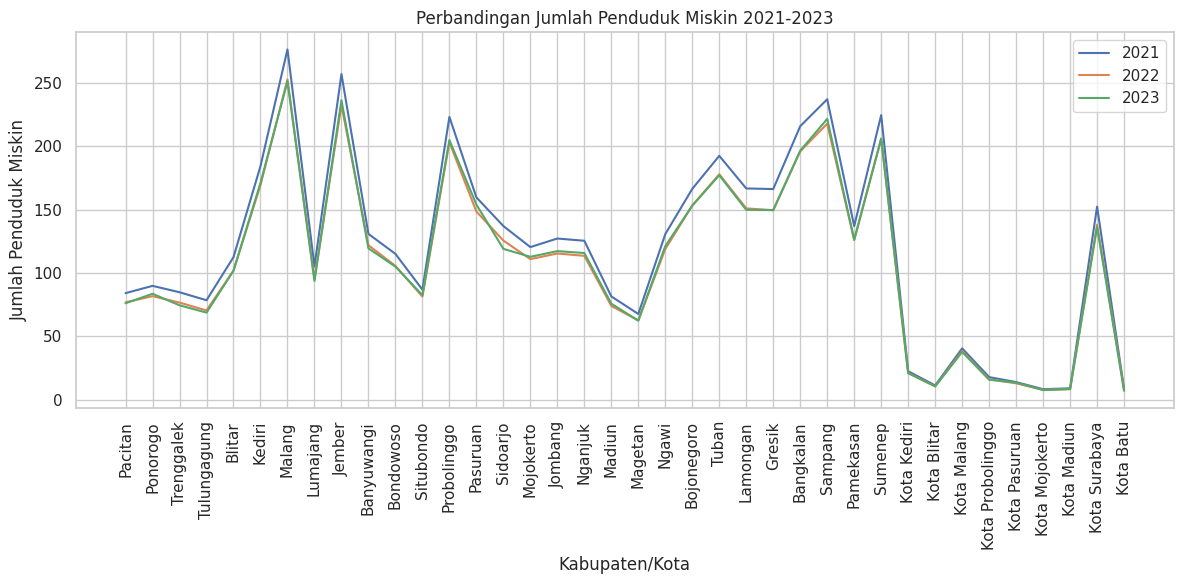

Hasil Analisis Kenaikan Jumlah Penduduk Miskin di Jawa Timur

Kenaikan 2021-2022:
Tidak ada kenaikan

Kenaikan 2022-2023:
- Ponorogo: 1.91
- Kediri: 1.72
- Jember: 3.73
- Situbondo: 1.16
- Probolinggo: 1.79
- Pasuruan: 5.47
- Mojokerto: 1.83
- Jombang: 1.88
- Nganjuk: 2.23
- Madiun: 1.80
- Ngawi: 2.28
- Gresik: 0.11
- Bangkalan: 0.55
- Sampang: 3.74
- Pamekasan: 0.41
- Kota Pasuruan: 0.54

Rata-rata kenaikan 2022-2023: 1.95

Ringkasan:
Jumlah daerah yang mengalami kenaikan 2021-2022: 0
Jumlah daerah yang mengalami kenaikan 2022-2023: 16

Rata-rata kenaikan keseluruhan: 1.95


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Kab/Kota'], data['Penduduk Miskin_2021'], label='2021')
plt.plot(data['Kab/Kota'], data['Penduduk Miskin_2022'], label='2022')
plt.plot(data['Kab/Kota'], data['Penduduk Miskin_2023'], label='2023')
plt.xticks(rotation=90)
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Penduduk Miskin')
plt.title('Perbandingan Jumlah Penduduk Miskin 2021-2023')
plt.legend()
plt.tight_layout()
plt.show()

# Menghitung dan menampilkan hasil
kenaikan_2021_2022, kenaikan_2022_2023 = hitung_kenaikan(data)
tampilkan_hasil(kenaikan_2021_2022, kenaikan_2022_2023)

In [ ]:
def hitung_kenaikan_pengangguran(data):
    kenaikan_2021_2022 = []
    kenaikan_2022_2023 = []

    for _, row in data.iterrows():
        if row['TPT_2022'] > row['TPT_2021']:
            kenaikan_2021_2022.append((row['Kab/Kota'], row['TPT_2022'] - row['TPT_2021']))
        if row['TPT_2023'] > row['TPT_2022']:
            kenaikan_2022_2023.append((row['Kab/Kota'], row['TPT_2023'] - row['TPT_2022']))

    return kenaikan_2021_2022, kenaikan_2022_2023

def tampilkan_hasil_pengangguran(kenaikan_2021_2022, kenaikan_2022_2023):
    print("Hasil Analisis Kenaikan Tingkat Pengangguran Terbuka di Jawa Timur")
    print("=" * 70)

    print("\nKenaikan TPT 2021-2022:")
    if kenaikan_2021_2022:
        for kabupaten, kenaikan in kenaikan_2021_2022:
            print(f"- {kabupaten}: {kenaikan:.2f}")
        rata_rata = sum(k[1] for k in kenaikan_2021_2022) / len(kenaikan_2021_2022)
        print(f"\nRata-rata kenaikan TPT 2021-2022: {rata_rata:.2f}")
    else:
        print("Tidak ada kenaikan")

    print("\nKenaikan TPT 2022-2023:")
    if kenaikan_2022_2023:
        for kabupaten, kenaikan in kenaikan_2022_2023:
            print(f"- {kabupaten}: {kenaikan:.2f}")
        rata_rata = sum(k[1] for k in kenaikan_2022_2023) / len(kenaikan_2022_2023)
        print(f"\nRata-rata kenaikan TPT 2022-2023: {rata_rata:.2f}")
    else:
        print("Tidak ada kenaikan")

    print("\nRingkasan:")
    print(f"Jumlah daerah yang mengalami kenaikan TPT 2021-2022: {len(kenaikan_2021_2022)}")
    print(f"Jumlah daerah yang mengalami kenaikan TPT 2022-2023: {len(kenaikan_2022_2023)}")

    total_kenaikan = sum(k[1] for k in kenaikan_2021_2022) + sum(k[1] for k in kenaikan_2022_2023)
    total_daerah = len(kenaikan_2021_2022) + len(kenaikan_2022_2023)
    rata_rata_keseluruhan = total_kenaikan / total_daerah if total_daerah > 0 else 0
    print(f"\nRata-rata kenaikan TPT keseluruhan: {rata_rata_keseluruhan:.2f}")

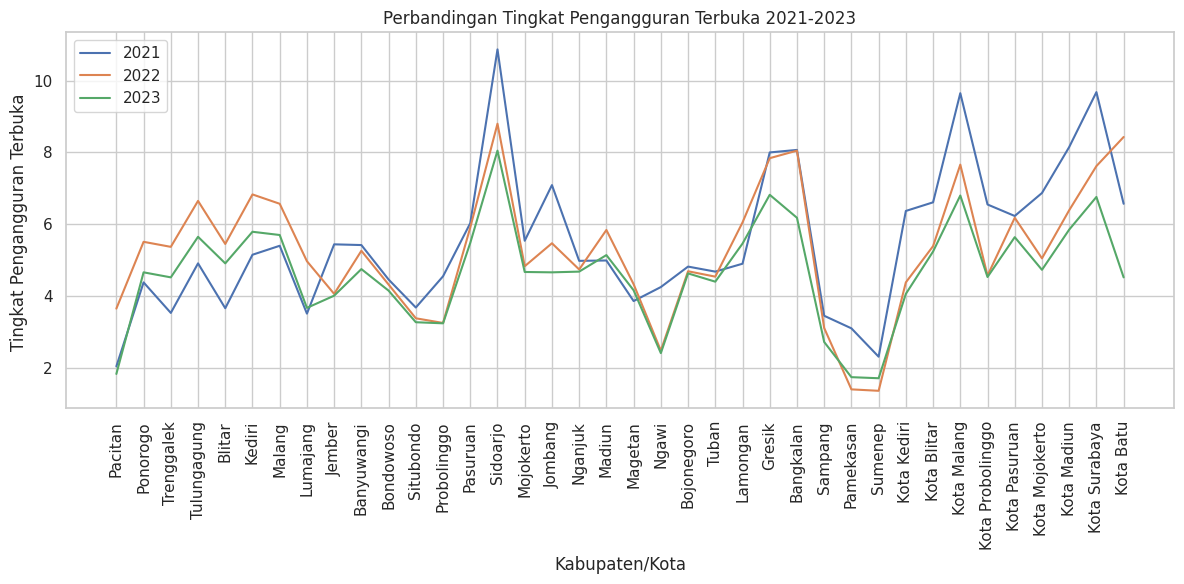

Hasil Analisis Kenaikan Tingkat Pengangguran Terbuka di Jawa Timur

Kenaikan TPT 2021-2022:
- Pacitan: 1.61
- Ponorogo: 1.13
- Trenggalek: 1.84
- Tulungagung: 1.74
- Blitar: 1.79
- Kediri: 1.68
- Malang: 1.17
- Lumajang: 1.46
- Madiun: 0.85
- Magetan: 0.47
- Lamongan: 1.15
- Kota Batu: 1.86

Rata-rata kenaikan TPT 2021-2022: 1.40

Kenaikan TPT 2022-2023:
- Pamekasan: 0.34
- Sumenep: 0.35

Rata-rata kenaikan TPT 2022-2023: 0.34

Ringkasan:
Jumlah daerah yang mengalami kenaikan TPT 2021-2022: 12
Jumlah daerah yang mengalami kenaikan TPT 2022-2023: 2

Rata-rata kenaikan TPT keseluruhan: 1.25


In [ ]:
# Visualisasi data TPT
plt.figure(figsize=(12, 6))
plt.plot(data['Kab/Kota'], data['TPT_2021'], label='2021')
plt.plot(data['Kab/Kota'], data['TPT_2022'], label='2022')
plt.plot(data['Kab/Kota'], data['TPT_2023'], label='2023')
plt.xticks(rotation=90)
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Tingkat Pengangguran Terbuka ')
plt.title('Perbandingan Tingkat Pengangguran Terbuka 2021-2023')
plt.legend()
plt.tight_layout()
plt.show()

# Menghitung dan menampilkan hasil
kenaikan_2021_2022, kenaikan_2022_2023 = hitung_kenaikan_pengangguran(data)
tampilkan_hasil_pengangguran(kenaikan_2021_2022, kenaikan_2022_2023)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Memilih kolom yang akan dinormalisasi
columns_to_normalize = ['Penduduk Miskin_2021', 'Penduduk Miskin_2022', 'Penduduk Miskin_2023', 'TPT_2021', 'TPT_2022', 'TPT_2023']

# Mengambil subset dataset untuk kolom yang akan dinormalisasi
subset_data = data[columns_to_normalize]

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan normalisasi pada subset dataset
normalized_data = scaler.fit_transform(subset_data)

# Mengganti kolom asli dengan data yang telah dinormalisasi
data[columns_to_normalize] = normalized_data

# Sekarang data Anda telah dinormalisasi pada kolom yang telah dipilih

In [ ]:
data

,No,Kode_Provinsi,Provinsi,Kode_kabupaten_kota,Kab/Kota,Penduduk Miskin_2021,Penduduk Miskin_2022,Penduduk Miskin_2023,TPT_2021,TPT_2022,TPT_2023
0,1,35,Jawa Timur,3501,Pacitan,-0.492657,-0.494521,-0.504826,-1.754315,-0.926512,-2.009284
1,2,35,Jawa Timur,3502,Ponorogo,-0.414285,-0.421769,-0.393426,-0.574600,0.135191,-0.002053
2,3,35,Jawa Timur,3503,Trenggalek,-0.483116,-0.497210,-0.528857,-1.003129,0.055278,-0.101351
3,4,35,Jawa Timur,3504,Tulungagung,-0.568984,-0.590277,-0.614447,-0.307400,0.785913,0.700123
4,5,35,Jawa Timur,3505,Blitar,-0.105158,-0.120905,-0.123010,-0.937589,0.100943,0.175264
5,6,35,Jawa Timur,3506,Kediri,0.874424,0.887753,0.904069,-0.186403,0.888659,0.799421
6,7,35,Jawa Timur,3507,Malang,2.129602,2.133936,2.093427,-0.060366,0.740248,0.735586
7,8,35,Jawa Timur,3508,Lumajang,-0.205611,-0.223982,-0.243458,-1.013212,-0.173045,-0.704229
8,9,35,Jawa Timur,3509,Jember,1.863955,1.832922,1.872406,-0.040199,-0.692481,-0.463078
9,10,35,Jawa Timur,3510,Banyuwangi,0.144405,0.178914,0.137765,-0.050282,-0.007511,0.061781


**MELAKUKAN CLUSTER**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

# Menyimpan kolom 'Kode_Provinsi', 'Provinsi', 'Kode_kabupaten_kota' dan  'Kab/Kota' dalam variabel terpisah
data_selec = data[['Kode_Provinsi', 'Provinsi', 'Kode_kabupaten_kota', 'Kab/Kota']]

# Melakukan drop kolom 'Kode_Provinsi', 'Provinsi', 'Kode_kabupaten_kota', dan 'Kab/Kota' dari
data = data.drop(['Kode_Provinsi', 'Provinsi', 'Kode_kabupaten_kota', 'Kab/Kota'], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk 2 cluster: 0.5614895528898747
Silhouette Score untuk 3 cluster: 0.5012135350751514
Silhouette Score untuk 4 cluster: 0.4662675832798058


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk 5 cluster: 0.4425726483285776


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk 6 cluster: 0.4324627741350851
Silhouette Score untuk 7 cluster: 0.38245626136177213


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk 8 cluster: 0.37961814944007005


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk 9 cluster: 0.3693975623964424


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk 10 cluster: 0.38225693459729526
Jumlah cluster terbaik berdasarkan Silhouette Score: 2


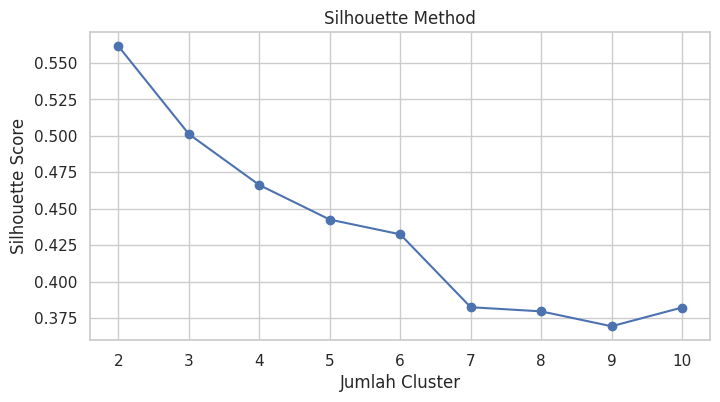

In [ ]:
# Menentukan jumlah cluster yang akan dicoba
jumlah_cluster = range(2, 11)

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Melakukan clustering dengan jumlah cluster yang berbeda
for k in jumlah_cluster:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    # Menghitung Silhouette Score untuk jumlah cluster saat ini
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

    # Cetak angka Silhouette Score untuk setiap jumlah cluster
    print(f"Silhouette Score untuk {k} cluster: {score}")

# Jumlah cluster dengan Silhouette Score tertinggi
best_cluster = jumlah_cluster[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah cluster terbaik berdasarkan Silhouette Score: {best_cluster}")

# Plot Silhouette Method
plt.figure(figsize=(8, 4))
plt.plot(jumlah_cluster, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index untuk 2 cluster: 0.5800871542316437
Davies-Bouldin Index untuk 3 cluster: 0.6216076634422785
Davies-Bouldin Index untuk 4 cluster: 0.6485582040405029
Davies-Bouldin Index untuk 5 cluster: 0.6913765761782171
Davies-Bouldin Index untuk 6 cluster: 0.7428534348904949


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index untuk 7 cluster: 0.721551792503171
Davies-Bouldin Index untuk 8 cluster: 0.7721476719854998
Davies-Bouldin Index untuk 9 cluster: 0.7702441282513428
Davies-Bouldin Index untuk 10 cluster: 0.7834107589255767
Jumlah cluster terbaik berdasarkan Davies-Bouldin Index: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


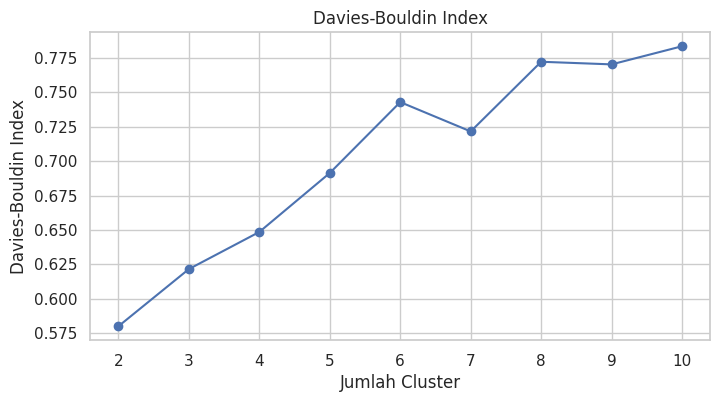

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Melakukan load data atau proses preprocessing data
# ...

# Menentukan jumlah cluster yang akan dicoba
jumlah_cluster = range(2, 11)

# Inisialisasi list untuk menyimpan nilai Davies-Bouldin Index
davies_bouldin_scores = []

# Melakukan clustering dengan jumlah cluster yang berbeda
for k in jumlah_cluster:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    # Menghitung Davies-Bouldin Index untuk jumlah cluster saat ini
    davies_bouldin_score_current = davies_bouldin_score(data, kmeans.labels_)

    davies_bouldin_scores.append(davies_bouldin_score_current)

    # Cetak angka Davies-Bouldin Index untuk setiap jumlah cluster
    print(f"Davies-Bouldin Index untuk {k} cluster: {davies_bouldin_score_current}")

# Jumlah cluster dengan Davies-Bouldin Index terendah
best_cluster_davies_bouldin = jumlah_cluster[davies_bouldin_scores.index(min(davies_bouldin_scores))]
print(f"Jumlah cluster terbaik berdasarkan Davies-Bouldin Index: {best_cluster_davies_bouldin}")

# Plot Davies-Bouldin Index
plt.figure(figsize=(8, 4))
plt.plot(jumlah_cluster, davies_bouldin_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


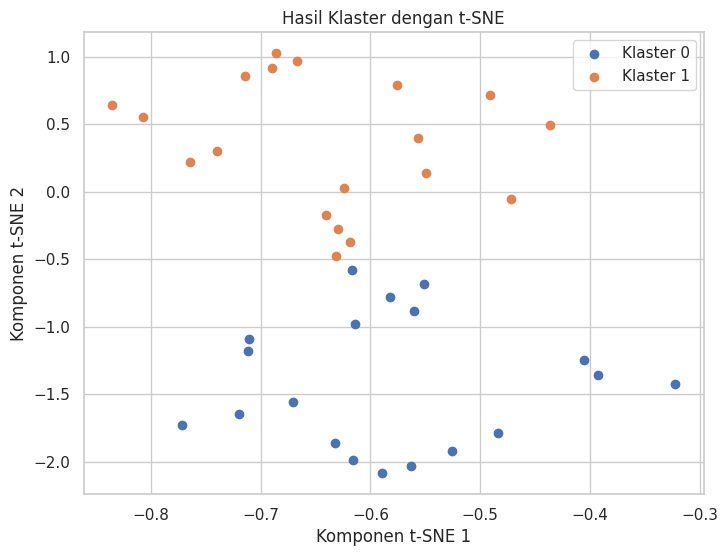

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Melakukan load data atau proses preprocessing data
# ...

# Menentukan jumlah cluster yang akan dicoba (telah diketahui hasil terbaik = 2)
jumlah_cluster = 2

# Inisialisasi KMeans dengan jumlah cluster terbaik
kmeans = KMeans(n_clusters=jumlah_cluster)
kmeans.fit(data)

# Reduksi dimensi data menjadi 2D menggunakan t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data)

# Menambahkan kolom "Cluster" ke dalam DataFrame
data['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering dengan t-SNE
plt.figure(figsize=(8, 6))
for cluster_num in range(jumlah_cluster):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(data_tsne[data['Cluster'] == cluster_num, 0],
                data_tsne[data['Cluster'] == cluster_num, 1],
                label=f'Klaster {cluster_num}')
plt.xlabel('Komponen t-SNE 1')
plt.ylabel('Komponen t-SNE 2')
plt.title('Hasil Klaster dengan t-SNE')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Misalkan data adalah dataset Anda
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

cluster_centers = kmeans.cluster_centers_
print("Nilai Rata-rata Setiap Klaster:")
for i, center in enumerate(cluster_centers):
    print(f"Klaster {i}: {center}")

Nilai Rata-rata Setiap Klaster:
Klaster 0: [ 1.00000000e+01  2.12024078e-01  2.10969198e-01  2.11667669e-01
 -2.45309574e-01  2.01285062e-02  8.77253473e-03  1.00000000e+00]
Klaster 1: [ 2.90000000e+01 -2.12024078e-01 -2.10969198e-01 -2.11667669e-01
  2.45309574e-01 -2.01285062e-02 -8.77253473e-03  0.00000000e+00]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from google.colab import files

# Melakukan load data atau proses preprocessing data
# ...

# Menentukan jumlah cluster terbaik
best_cluster = 2

# Melakukan clustering dengan jumlah cluster terbaik
kmeans = KMeans(n_clusters=best_cluster)
kmeans.fit(data)

# Menambahkan kolom "Cluster" ke dalam DataFrame data_selec
data_selec['Cluster'] = kmeans.labels_

# Menggabungkan kolom 'Kab/kota' dari data_selec dengan DataFrame 'data' berdasarkan indeks
data['Kab/Kota'] = data_selec['Kab/Kota']

# Cetak hasil data dengan kolom 'Kab/kota' sudah ditambahkan
print(data)

# Menyimpan DataFrame data ke dalam file CSV
file_name = 'Jawa_Timur.csv'  # Nama file yang ingin Anda berikan
data.to_csv(file_name, index=False)

# Download file CSV
files.download(file_name)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    No  Penduduk Miskin_2021  Penduduk Miskin_2022  Penduduk Miskin_2023  \
0    1             -0.492657             -0.494521             -0.504826   
1    2             -0.414285             -0.421769             -0.393426   
2    3             -0.483116             -0.497210             -0.528857   
3    4             -0.568984             -0.590277             -0.614447   
4    5             -0.105158             -0.120905             -0.123010   
5    6              0.874424              0.887753              0.904069   
6    7              2.129602              2.133936              2.093427   
7    8             -0.205611             -0.223982             -0.243458   
8    9              1.863955              1.832922              1.872406   
9   10              0.144405              0.178914              0.137765   
10  11             -0.070266             -0.064885             -0.075690   
11  12             -0.455038             -0.426848             -0.409595   
12  13      

<ipython-input-100-565f842c2e27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selec['Cluster'] = kmeans.labels_


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Menampilkan total isi cluster
cluster_counts = data['Cluster'].value_counts()

# Cetak total isi cluster
print("Total isi setiap cluster:")
print(cluster_counts)

Total isi setiap cluster:
Cluster
1    19
0    19
Name: count, dtype: int64
